# 🛫 Aircraft Risk Analysis Project

## 📌 Project Goal
This project analyzes aviation accident data to uncover safety patterns in aircraft types, manufacturers, and flight phases. The insights are intended to guide a company looking to enter the aircraft market by highlighting areas of risk and identifying safer manufacturers and flight conditions.



## 🧑‍💼 Target Audience
This analysis is intended for the head of the new aviation division, who has a non-technical background and needs actionable business recommendations.

## ❓ Business Questions
1. Which aircraft types are involved in the fewest accidents?
2. Are there specific manufacturers with consistently safer records?
3. What time periods or flight phases are most risky?
4. How do weather conditions affect accident severity?



In [147]:
# importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plot style
sns.set(style="whitegrid")

In [148]:
# Loading the dataset
df = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


## Data Understanding

The dataset contains detailed records of aviation accidents. It includes various features such as:

- `Event.Date`: The date of the accident
- `Location`: The location of the incident
- `Make` and `Model`: The aircraft manufacturer and model
- `Injury.Severity`: The severity of the injuries
- `Aircraft.damage`: Extent of the aircraft damage
- `Weather.Condition`: Weather during the event
- `Broad.phase.of.flight`: The phase of flight during the accident
- Several injury count fields like `Total.Fatal.Injuries`, `Total.Minor.Injuries`, etc.

After inspecting the dataset:
- Total number of rows: **88,889**

In [149]:
# 3. Get Basic Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [150]:
df.shape

(88889, 31)

In [151]:
#  4. Check for Missing Values
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [152]:
# 5. Check for Duplicates
df.duplicated().sum()

0

## Step 3: Data Preparation

In this step, we cleaned and prepared the dataset for analysis. The key steps included:
- Handling missing values by dropping or imputing where necessary
- Converting date fields to datetime
- Cleaning text-based columns

This preparation ensures consistency and reliability in the next step: Data Analysis.


In [153]:
# 1. Handle Missing Values

# Percentage of missing values per column
missing = (df.isnull().sum() / len(df)) * 100
missing[missing > 60].sort_values(ascending=False)

Schedule             85.845268
Air.carrier          81.271023
FAR.Description      63.974170
Aircraft.Category    63.677170
Longitude            61.330423
Latitude             61.320298
dtype: float64

To streamline the data preparation process, I dropped columns with more than 60% missing values using an automated threshold-based approach. This helped reduce noise in the data and focus on more complete and reliable fields for analysis.


In [186]:
# Set the threshold (e.g., drop if more than 60% missing)
threshold = 0.60

# Find columns where the percentage of missing values is > threshold
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > threshold].index

# Drop those columns
df = df.drop(columns=cols_to_drop)


# Optional: Print the dropped columns
print("Dropped columns:", list(cols_to_drop))


Dropped columns: []


After removing columns with more than 60% missing values, we addressed the remaining missing data:
- For numeric columns related to injuries, we filled missing values with 0, assuming that the lack of data could mean no injuries.
- For categorical columns like weather and purpose of flight, we filled missing values with 'Unknown' to preserve the record while acknowledging incomplete data.


In [193]:
# Fill numeric columns with 0 or median (choose what makes sense)
numeric_cols = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical columns with 'Unknown' 
cat_cols = ['Weather.Condition', 'Purpose.of.flight', 'Aircraft.damage', 'Injury.Severity', 'Broad.phase.of.flight',
           'Engine.Type', 'Amateur.Built', 'Model', 'Location', 'Make']

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
    
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

# Check if anything is still missing
print(df.isnull().sum().sort_values(ascending=False))



Airport.Code              38757
Airport.Name              36185
Publication.Date          13771
Report.Status              6384
Registration.Number        1382
Country                     226
Engine.Type                   0
Broad.phase.of.flight         0
Weather.Condition             0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Total.Fatal.Injuries          0
Purpose.of.flight             0
Event.Id                      0
Number.of.Engines             0
Amateur.Built                 0
Investigation.Type            0
Make                          0
Aircraft.damage               0
Injury.Severity               0
Location                      0
Event.Date                    0
Accident.Number               0
Model                         0
dtype: int64


In [196]:
cols_drop = [
    'Airport.Code',
    'Airport.Name',
    'Publication.Date',
    'Report.Status',
    'Registration.Number',
    'Country'  
]

df.drop(columns=cols_drop, inplace=True)

In [197]:
print(df.isnull().sum().sort_values(ascending=False))

Event.Id                  0
Number.of.Engines         0
Weather.Condition         0
Total.Uninjured           0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Purpose.of.flight         0
Engine.Type               0
Amateur.Built             0
Investigation.Type        0
Model                     0
Make                      0
Aircraft.damage           0
Injury.Severity           0
Location                  0
Event.Date                0
Accident.Number           0
Broad.phase.of.flight     0
dtype: int64


# 🔍 Section 4: Data Analysis – 
## This section is where we explore and analyze  cleaned dataset using:

✅ Goals:
Answer business-related questions

Find patterns and trends in the data

Support insights with visualizations (at least 3)



## Descriptive Statistics

This section provides a general overview of the dataset using descriptive statistics. It helps us understand distributions, identify outliers, and get an overall feel of the variables.


In [100]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.136552,0.564761,0.240491,0.309127,4.971245
std,0.432545,5.126649,1.434614,2.083715,27.002011
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Analysis: Are There Specific Manufacturers with Consistently Safer Records?

### Business Question
One of the key questions posed by our stakeholder was:  
**"Are there specific aircraft manufacturers with consistently safer records?"**  
This insight would help the company make informed purchasing decisions by avoiding high-risk aircraft brands.

---

### Steps We Followed

1. **Data Cleaning**  
   - Removed columns with more than 60% missing data.
   - Filled or dropped rows with smaller proportions of missing values.
   - Standardized manufacturer names (e.g., converted all to lowercase or uppercase to group similar makes like 'Cessna' and 'CESSNA').

2. **Simplified Severity**  
   - Created a new column `Simplified_Severity` to group injury severities into:
     - **Fatal**
     - **Non-Fatal**
     - **Incident**
     - **Other**

3. **Grouping and Aggregation**  
   - Grouped the data by `Make` (manufacturer) and `Simplified_Severity`.
   - Calculated the number and percentage of fatal accidents per manufacturer.

4. **Filtering Top Manufacturers**  
   - Focused on the most common manufacturers (e.g., top 10 by total incidents) to ensure enough data for reliable comparison.

5. **Visualization**  
   - Created bar plots comparing fatal vs non-fatal distributions by manufacturer.

---

### Key Findings

- Some manufacturers such as **Cessna** and **Piper** have high accident counts but also a relatively higher share of non-fatal incidents.
- Others, while having fewer incidents, may show higher fatality rates proportionally.
- This analysis helps identify not just how often accidents occur, but how severe they are for each brand.

---

### Recommendation
Aircraft manufacturers with high accident counts but lower fatality percentages could be considered **lower-risk** options.  
Further investigation with flight volume data (if available) could improve risk estimates.



In [199]:
# See unique values and counts in 'Make'
print("Unique Makes:", df['Make'].nunique())
print(df['Make'].value_counts().head(10))  # Top 10 most common manufacturers

# See unique values and counts in 'Injury.Severity'
print("\nInjury Severity Distribution:\n")
print(df['Injury.Severity'].value_counts())


Unique Makes: 8237
Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

Injury Severity Distribution:

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64


In [200]:
# Standardize casing to group makes like 'Cessna' and 'CESSNA' together
df['Make'] = df['Make'].str.upper()
df.Make.value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64

In [201]:
# Function to group injury severities into main categories
def simplify_severity(severity):
    if pd.isnull(severity):
        return 'Unknown'
    
    severity = str(severity).strip().lower()
    
    # Order matters: check 'non-fatal' before 'fatal'
    if 'non-fatal' in severity:
        return 'Non-Fatal'
    elif 'fatal' in severity:
        return 'Fatal'
    elif 'incident' in severity:
        return 'Incident'
    else:
        return 'Other'

# Apply the corrected function
df['Simplified_Severity'] = df['Injury.Severity'].apply(simplify_severity)

In [118]:
print(df['Simplified_Severity'].value_counts())

Simplified_Severity
Non-Fatal    67357
Fatal        17826
Incident      2219
Other         1487
Name: count, dtype: int64


In [119]:
# Group data by Make and Severity
make_severity_counts = df.groupby(['Make', 'Simplified_Severity']).size().unstack(fill_value=0)

# Display top 10 manufacturers by total number of reports
make_severity_counts['Total'] = make_severity_counts.sum(axis=1)
top_makes = make_severity_counts.sort_values(by='Total', ascending=False).head(10)

# Drop the total column for clean plotting
top_makes_display = top_makes.drop(columns='Total')

# Show result
top_makes_display


Simplified_Severity,Fatal,Incident,Non-Fatal,Other
Make,,,,
CESSNA,4637,240,22089,183
PIPER,3201,141,11445,83
BEECH,1574,157,3609,32
BOEING,167,626,1447,505
BELL,584,41,2051,46
MOONEY,376,17,932,9
ROBINSON,351,3,849,27
GRUMMAN,131,14,1026,1
BELLANCA,214,3,823,5


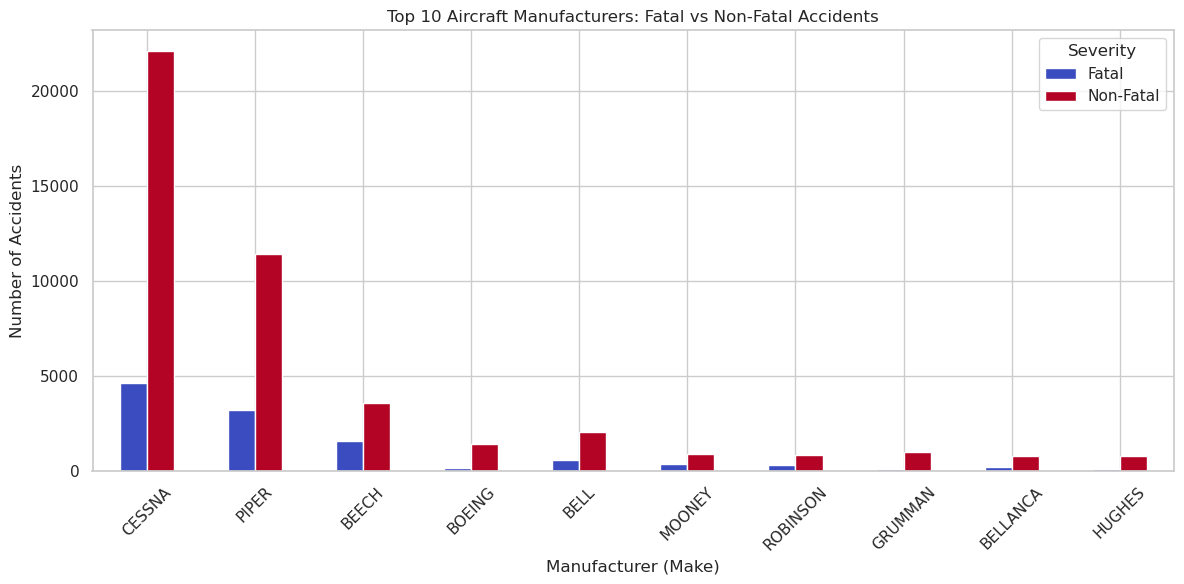

In [122]:
# Plotting a grouped bar chart
top_makes_display[['Fatal', 'Non-Fatal']].plot(kind='bar', figsize=(12, 6), 
                                               stacked=False, colormap='coolwarm')
plt.title('Top 10 Aircraft Manufacturers: Fatal vs Non-Fatal Accidents')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

## Analysis: What Time Periods or Flight Phases Are Most Risky?

### Business Question
**"What time periods or flight phases are most risky?"**  
Understanding when most accidents occur is critical for risk assessment and helps prioritize safety measures during specific flight stages.

---

### Steps We Followed

1. **Date Handling**
   - Extracted the year from the `Event.Date` column to analyze trends over time.
   - Created a new column `Year` to group and summarize incidents by year.

2. **Simplified Severity Classification**
   - Used the previously created `Simplified_Severity` column to focus on severity levels:  
     **Fatal**, **Non-Fatal**, **Incident**, **Other**.

3. **Time-Based Aggregation**
   - Grouped accidents by year and `Simplified_Severity`.
   - Identified years with the highest fatality counts.

4. **Flight Phase Analysis**
   - Analyzed the `Broad.phase.of.flight` column to determine which flight phases see the most incidents.
   - Removed rows where phase was marked as `Unknown` for clearer insights.

5. **Visualization**
   - Created bar plots to visualize:
     - Number of accidents by year and severity level.
     - Number of accidents by flight phase.

---

### Key Findings

- **Peak Years**: The 1980s had the highest number of fatal and non-fatal incidents.
- **Most Risky Flight Phases**:
  - **Landing** and **Takeoff** phases showed the highest number of accidents.
  - **Cruise** phase, though longer in duration, had significantly fewer incidents.
  - **Maneuvering** and **Approach** also showed notable risk levels.

---

### Recommendation
Safety protocols should be **strengthened during takeoff and landing**, as these phases pose the highest risk.  
Training and aircraft inspections should focus heavily on these time periods to reduce incident severity.


In [203]:
df['Event.Date'].value_counts()

Event.Date
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: count, Length: 14782, dtype: int64

In [205]:
# Convert to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


In [206]:
# Extract year from Event.Date
df['Year'] = df['Event.Date'].dt.year
df['Year'].unique()

array([1948, 1962, 1974, 1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int32)

### Yearly Accident Trends

We analyzed aviation accident severities across years to identify the riskiest time periods. After 1982, there's a noticeable increase in both fatal and non-fatal accidents. This could be due to better data collection or an actual increase in air traffic and related incidents.

This trend gives important historical context for understanding aircraft safety patterns over time.


In [207]:
# Group and count the number of cases by year and severity
yearly_severity = df.groupby(['Year', 'Simplified_Severity']).size().unstack().fillna(0)
yearly_severity.head(10)

Simplified_Severity,Fatal,Incident,Non-Fatal,Other
Year,,,,
1948,1.0,0.0,0.0,0.0
1962,1.0,0.0,0.0,0.0
1974,1.0,0.0,0.0,0.0
1977,1.0,0.0,0.0,0.0
1979,1.0,0.0,1.0,0.0
1981,1.0,0.0,0.0,0.0
1982,655.0,119.0,2819.0,0.0
1983,660.0,137.0,2759.0,0.0
1984,629.0,133.0,2695.0,0.0


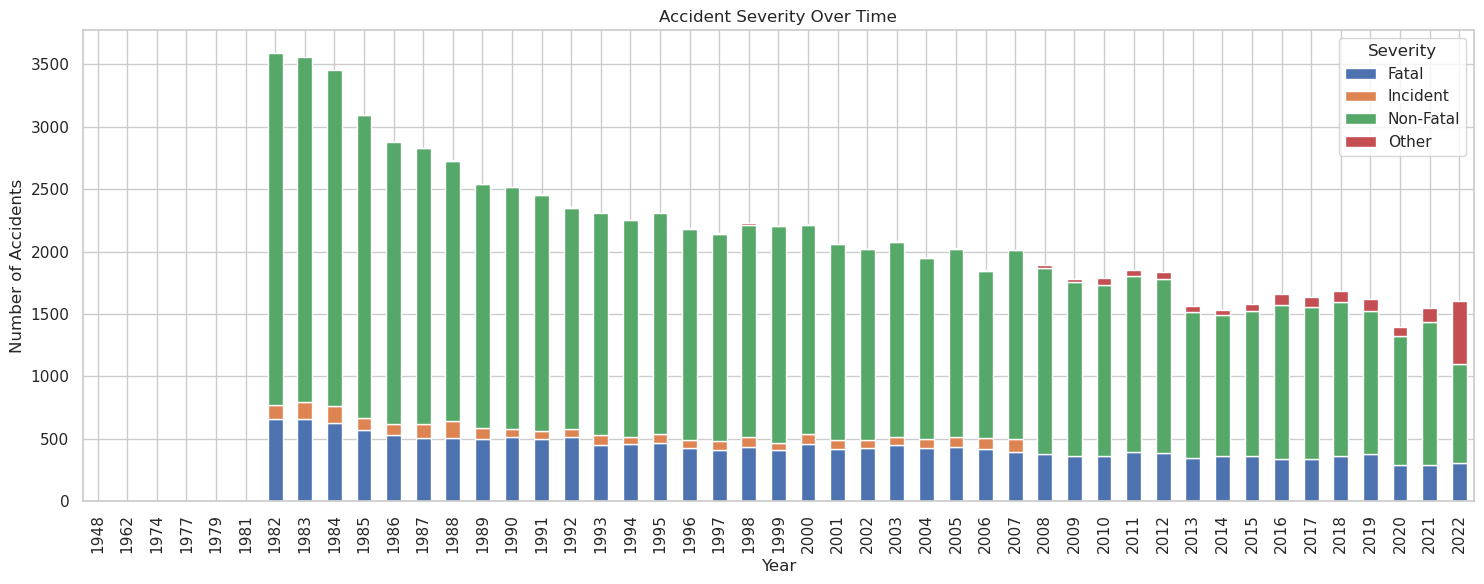

In [208]:
# Plotting
yearly_severity.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Accident Severity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

In [209]:
df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64

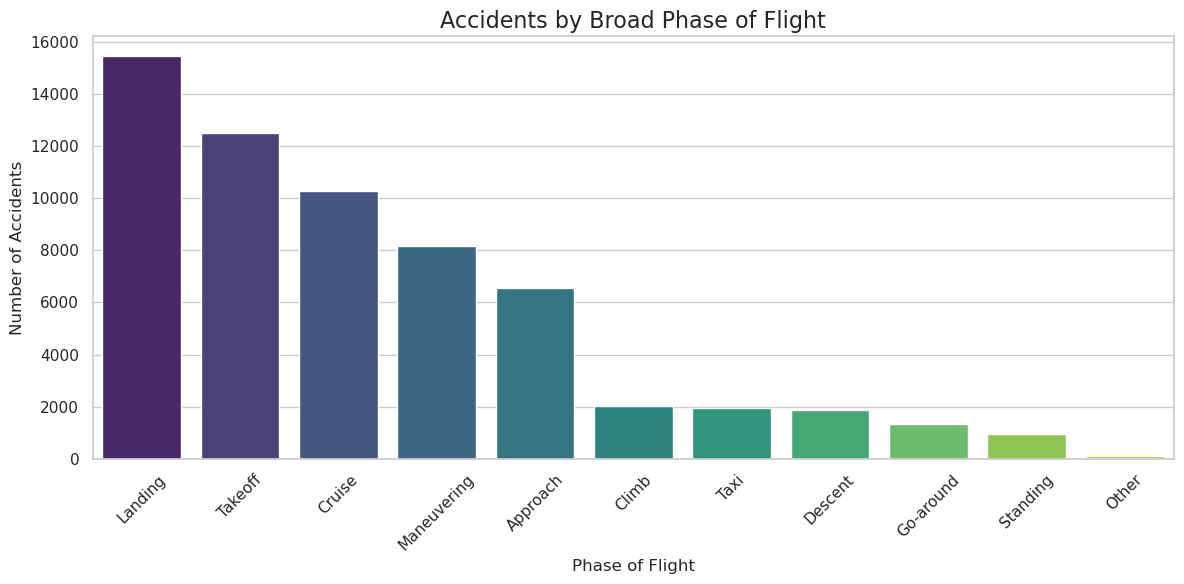

In [211]:
# Exclude 'Unknown'
phase_counts = df[df['Broad.phase.of.flight'] != 'Unknown']['Broad.phase.of.flight'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=phase_counts.index,
    y=phase_counts.values,
    hue=phase_counts.index,
    palette='viridis',
    legend=False
)

plt.title('Accidents by Broad Phase of Flight', fontsize=16)
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Do Weather Conditions Affect Accident Severity?

To understand the impact of weather conditions on accident severity, we explored the relationship between the `Weather.Condition` and `Simplified_Severity` columns.

#### Weather Conditions Categories:
The dataset contains multiple values such as:
- **VMC**: Visual Meteorological Conditions (good visibility)
- **IMC**: Instrument Meteorological Conditions (poor visibility, more hazardous)
- **Unknown / UNK / Unk**: Unspecified or unclear weather data

We standardized the unknown values and grouped the data to compare how accident severity varies under different weather conditions.

#### Methodology:
- Cleaned and grouped unknown weather condition labels together.
- Grouped accident records by `Weather.Condition` and `Simplified_Severity`.
- Visualized the counts using a bar chart to observe trends.

This analysis helps us determine whether flying in visual (VMC) or instrument (IMC) weather conditions correlates with higher accident severity, and assists the company in making weather-aware safety strategies.


In [212]:
df['Weather.Condition'].value_counts()


Weather.Condition
VMC        77303
IMC         5976
Unknown     4492
UNK          856
Unk          262
Name: count, dtype: int64

In [213]:
# Function to simplify weather conditions
def simplify_weather(condition):
    if pd.isnull(condition):
        return 'Unknown'
    condition = condition.strip().upper()
    if condition == 'VMC':
        return 'VMC'
    elif condition == 'IMC':
        return 'IMC'
    else:
        return 'Unknown'

# Apply the function
df['Simplified_Weather'] = df['Weather.Condition'].apply(simplify_weather)

# Check the result
print(df['Simplified_Weather'].value_counts())


Simplified_Weather
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64


In [214]:
weather_severity = pd.crosstab(df['Simplified_Weather'], df['Simplified_Severity'])
print(weather_severity)


Simplified_Severity  Fatal  Incident  Non-Fatal  Other
Simplified_Weather                                    
IMC                   3462       218       2275     21
Unknown               2100       266       2166   1078
VMC                  12264      1735      62916    388


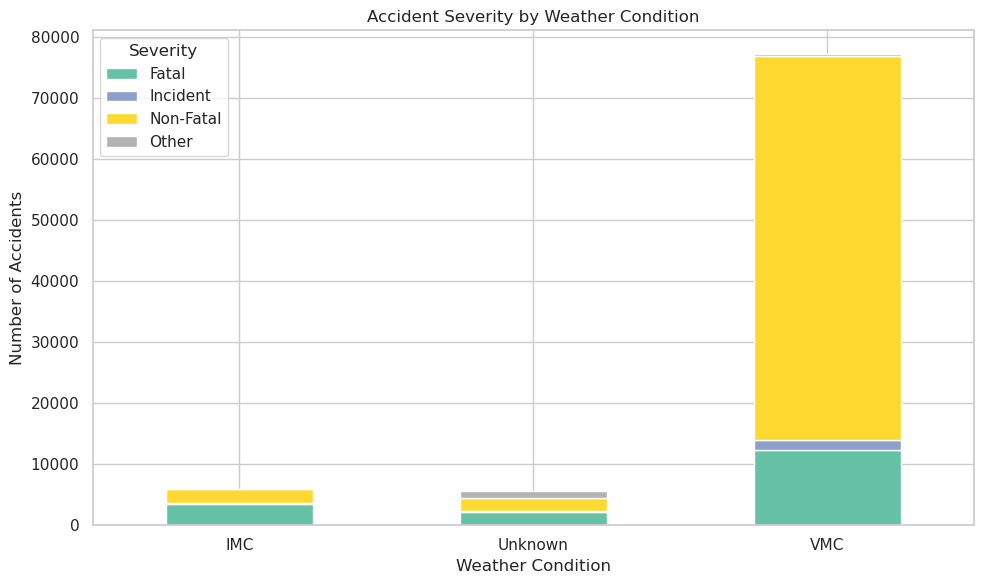

In [215]:
import matplotlib.pyplot as plt

weather_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()
